In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns
import cmcrameri.cm as cmc

import astropy.constants as cst

In [2]:
filename = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/grid_clean.h5"
tracks = pd.read_hdf(filename, "tracks")
tracks.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell
track                                                              
7000     0.92329  0.279311  0.001829  1.608258  0.000000   0.006041
7001     1.72329  0.229311  0.010871  2.308258  0.012396   0.006041
7002     2.12329  0.304311  0.004172  2.658258  0.015861   0.006041
7003     1.32329  0.254311  0.024469  1.958258  0.002481   0.006041
7004     1.12329  0.291811  0.006519  2.133258  0.000000   0.006041

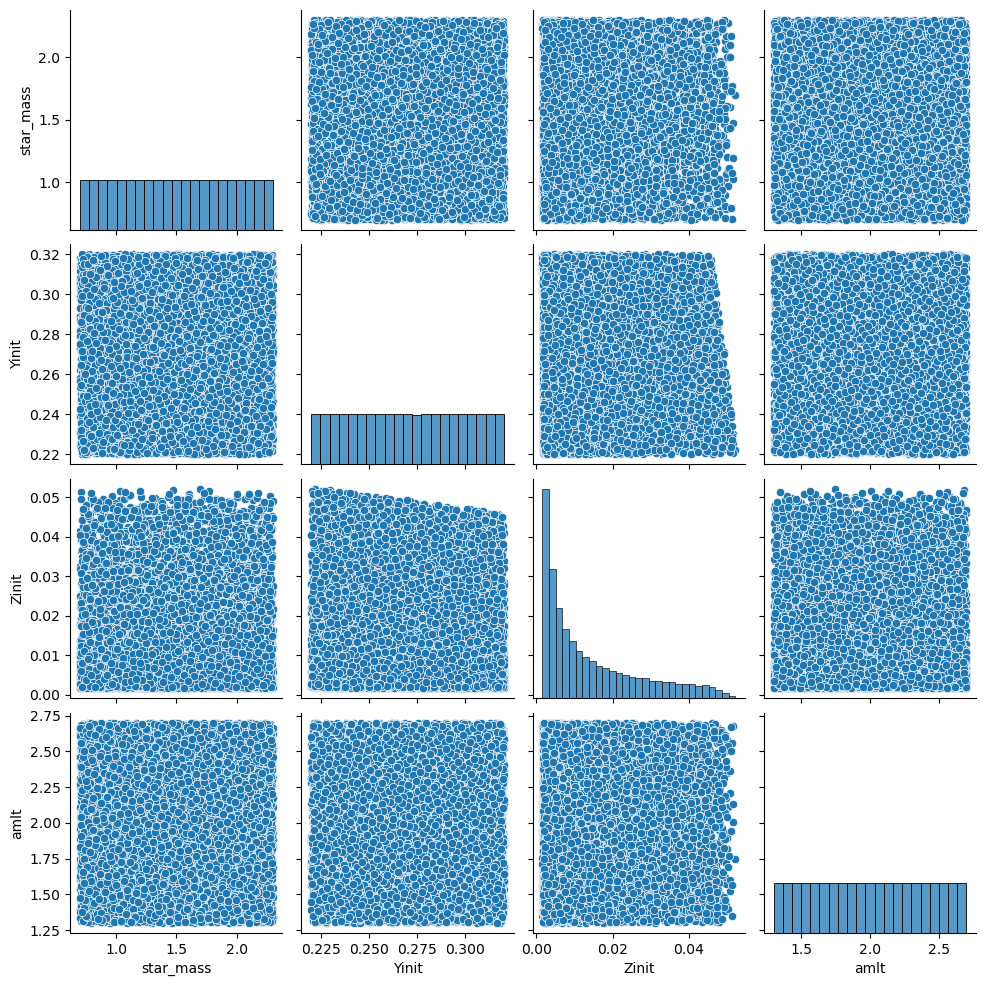

In [3]:
vars = ["star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(tracks, vars=vars);

In [4]:
stars = pd.read_hdf(filename, "stars")
stars.head()

star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   
      6     3.548000e+07  0.895385  6371.395675   0.716985 -45.411916   
      7     4.309136e+07  0.896934  6371.047385   0.716268 -45.426793   
      8     5.405171e+07  0.898494  6370.652426   0.715216 -45.434924   
      9     6.983463e+07  0.900101  6370.549143   0.713666 -45.432899   

            log_Lnuc  Dnu_freq_o     eps_o  delta_Pg  
track star                                            
7000  5     0.075810  148.331713  1.129892       0.0  
      6     0.076406  148.132217  1.129252       0.0  
      7     0.077627  147.755413  1.128080       0.0  
      8     0.078845  147.378001  1.126936       0.0  
      9     0.080196  146.987294  1.125761       0.0

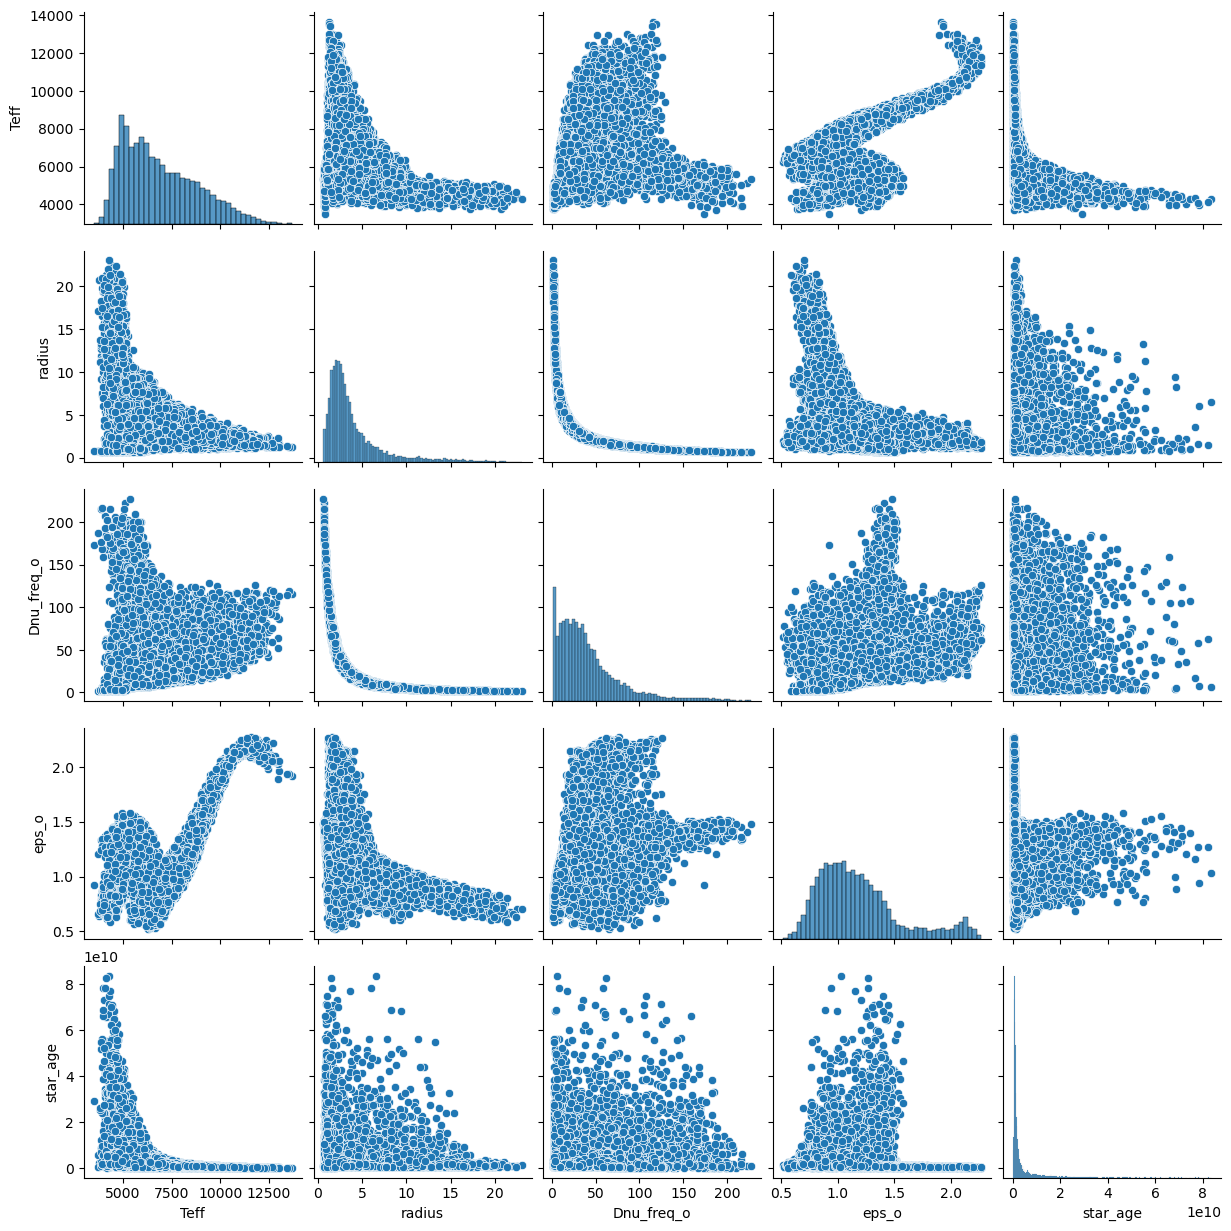

In [5]:
num_samples = 10000
vars = ["Teff", "radius", "Dnu_freq_o", "eps_o", "star_age"]
sns.pairplot(stars.sample(num_samples), vars=vars);

In [6]:
# mask = (stars.star_age < 2e10)
# grid = tracks.join(stars.loc[mask]).reset_index()
grid = tracks.join(stars).reset_index()
grid.head()

track  star  star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
0   7000     5    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
1   7000     6    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
2   7000     7    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
3   7000     8    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
4   7000     9    0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

       star_age    radius         Teff  center_h1    log_LHe  log_Lnuc  \
0  3.259691e+07  0.894573  6371.453759   0.717253 -45.402736  0.075810   
1  3.548000e+07  0.895385  6371.395675   0.716985 -45.411916  0.076406   
2  4.309136e+07  0.896934  6371.047385   0.716268 -45.426793  0.077627   
3  5.405171e+07  0.898494  6370.652426   0.715216 -45.434924  0.078845   
4  6.983463e+07  0.900101  6370.549143   0.713666 -45.432899  0.080196   

   Dnu_freq_o     eps_o  delta_Pg  
0  148.331713  1.129892       0.0  
1  148.132217  1.129252       0.0  
2  147.755413  1.128080       0.0  
3  147.378001  1.126936       0.0  
4  146.987294  1.125761       0.0

In [7]:
const = pd.read_hdf(filename, "constants")
const

msun    1.988410e+33
rsun    6.957000e+10
lsun    3.828000e+33
Tsun    5.772003e+03
dtype: float64

In [8]:
grid["luminosity"] = grid.radius**2 * (grid.Teff/const.Tsun)**4
grid["log_L"] = np.log10(grid.luminosity)
grid["log_Zinit"] = np.log10(grid.Zinit)
grid["log_age"] = np.log10(grid.star_age)

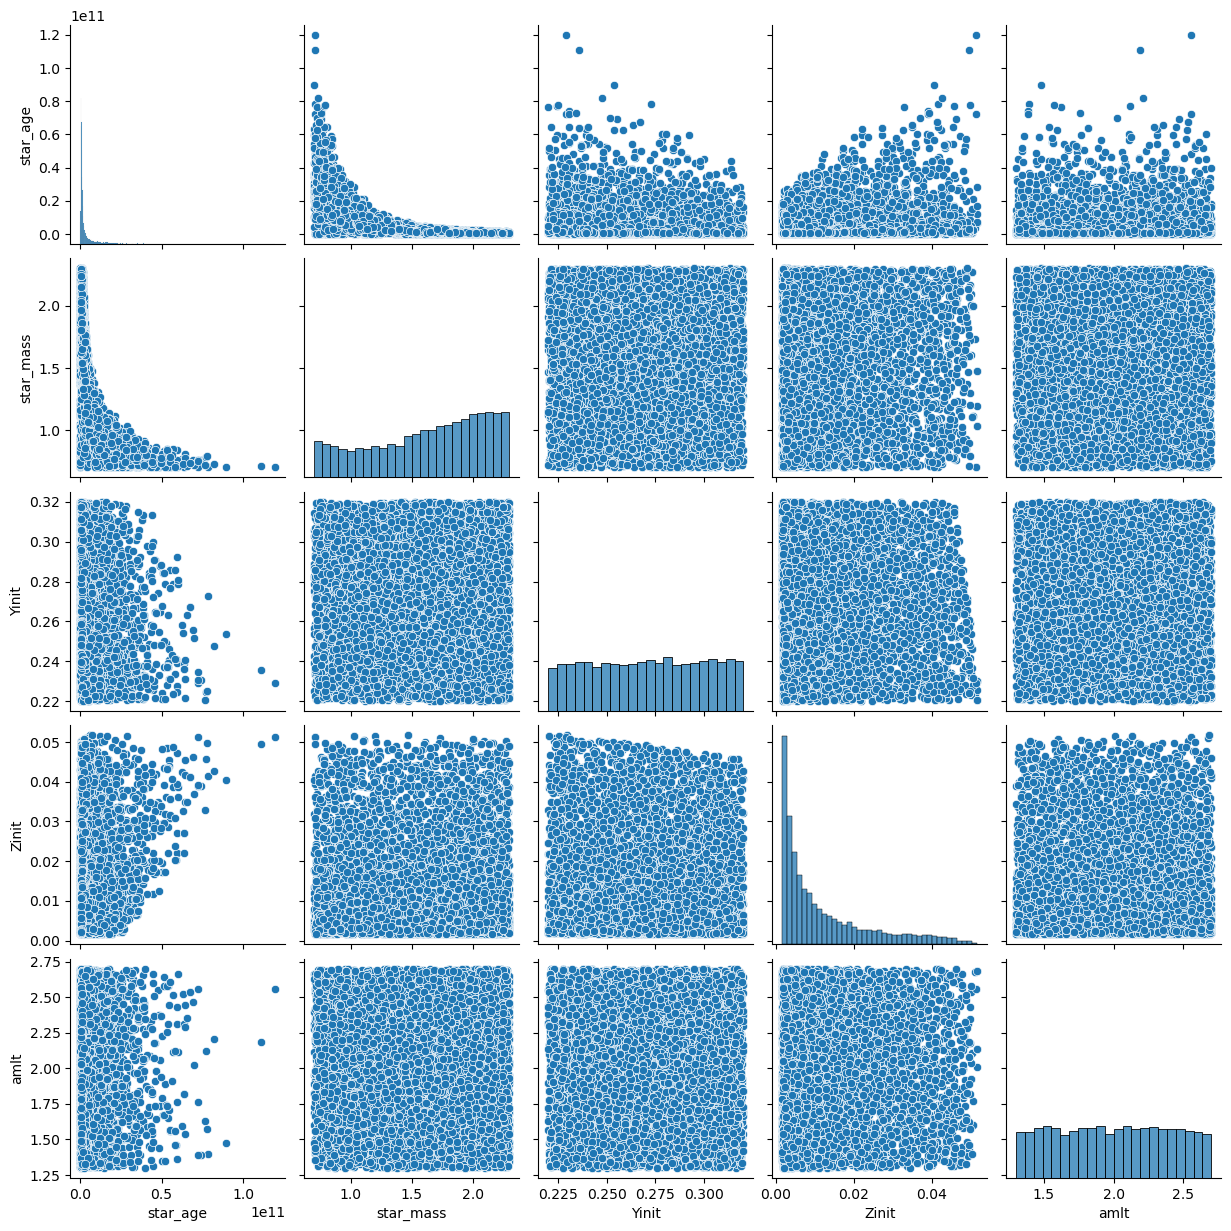

In [9]:
num_samples = 10000
vars = ["star_age", "star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

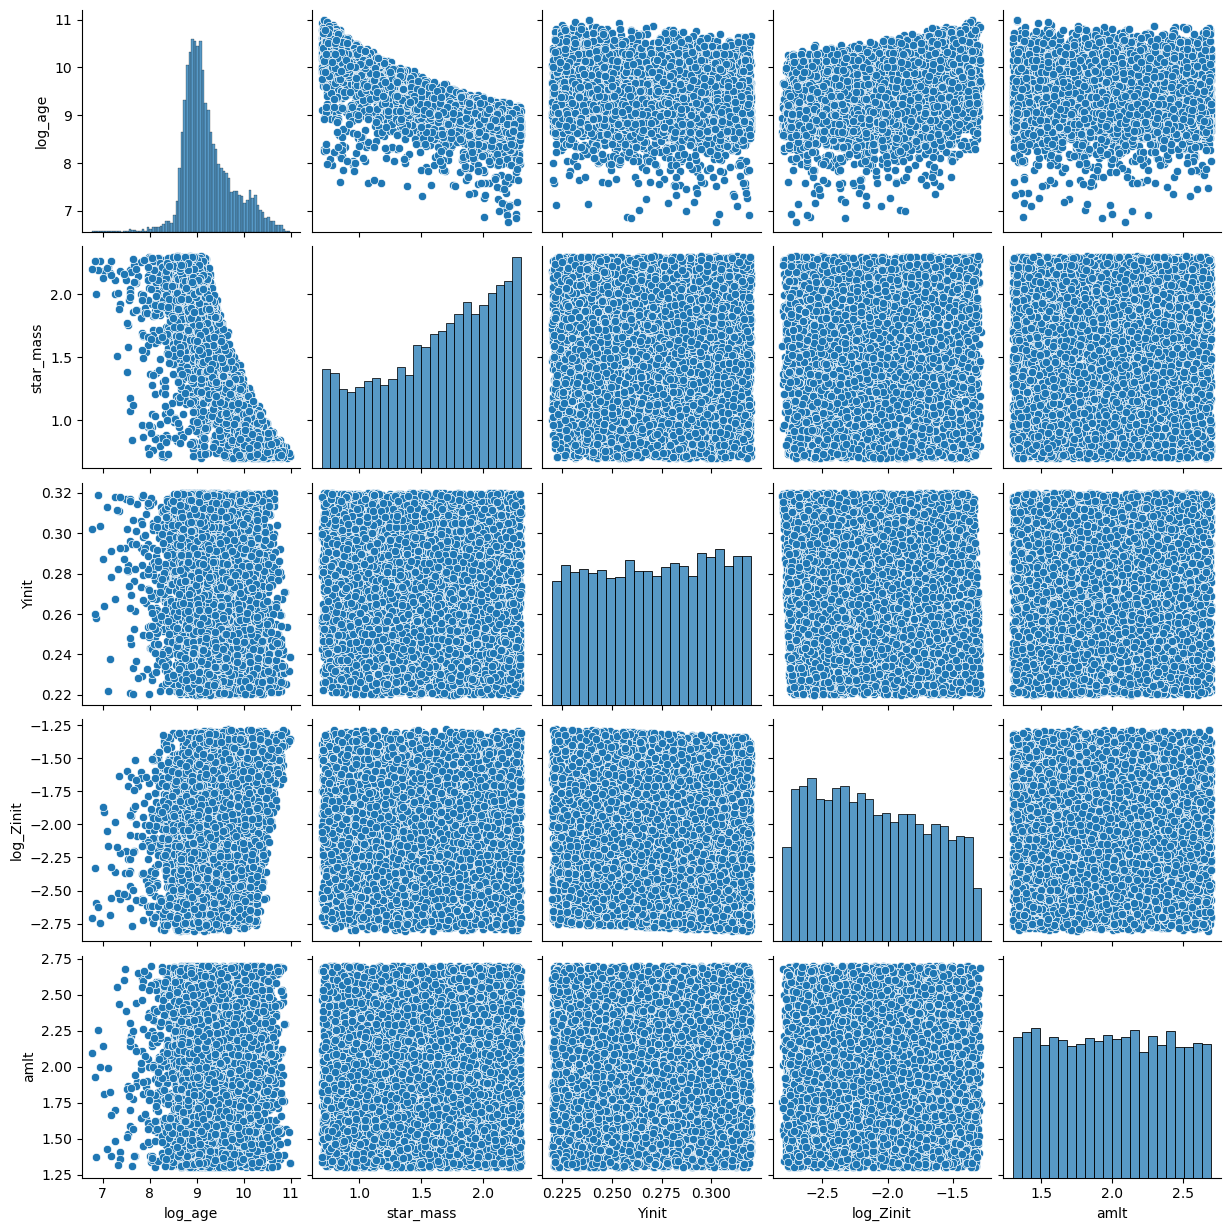

In [10]:
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [43]:
ts = grid.track.sample(100)
mask = grid.track.isin(ts)

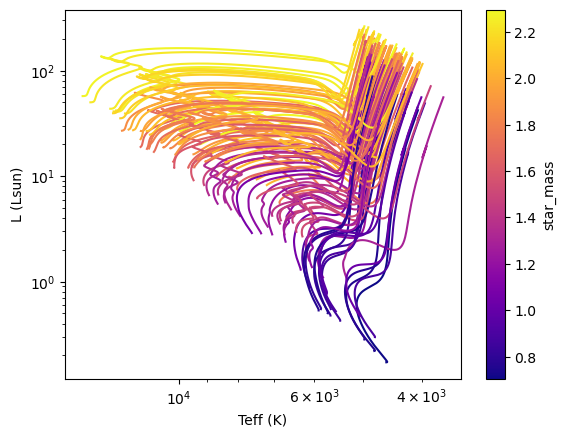

In [12]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

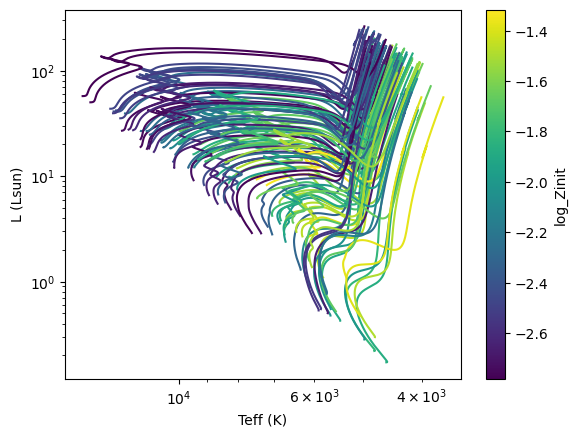

In [13]:
fig, ax = plt.subplots()
# cmap = cmc.hawaii
cmap = cm.viridis
colorby = "log_Zinit"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

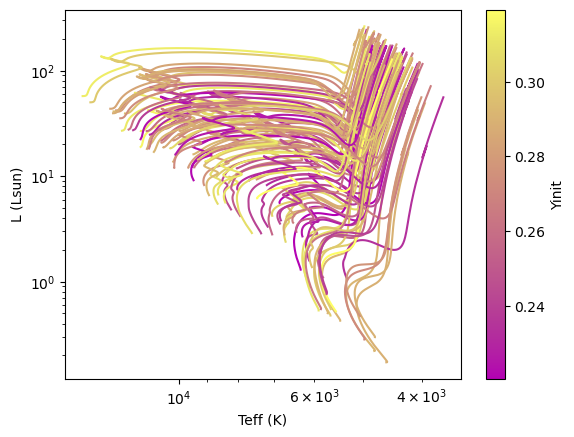

In [14]:
fig, ax = plt.subplots()
# cmap = cmc.buda
cmap = cmc.buda
colorby = "Yinit"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

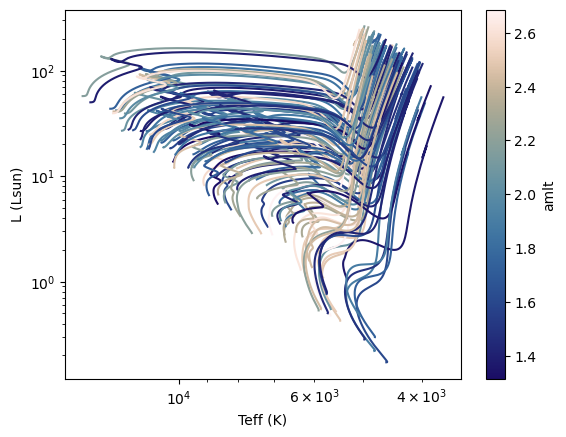

In [15]:
fig, ax = plt.subplots()
cmap = cmc.lapaz
colorby = "amlt"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="luminosity", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("L (Lsun)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

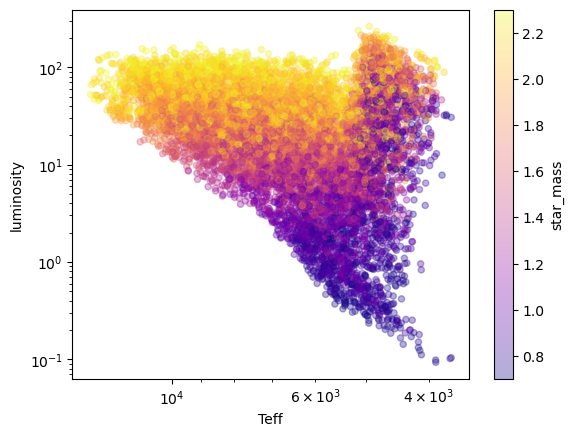

In [16]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="star_mass", cmap=cm.plasma, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

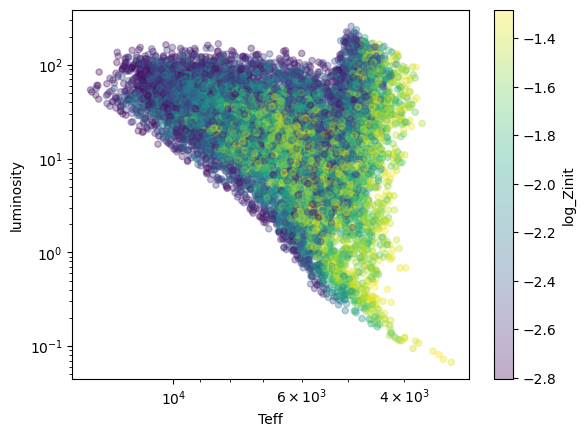

In [17]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="log_Zinit", cmap=cm.viridis, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

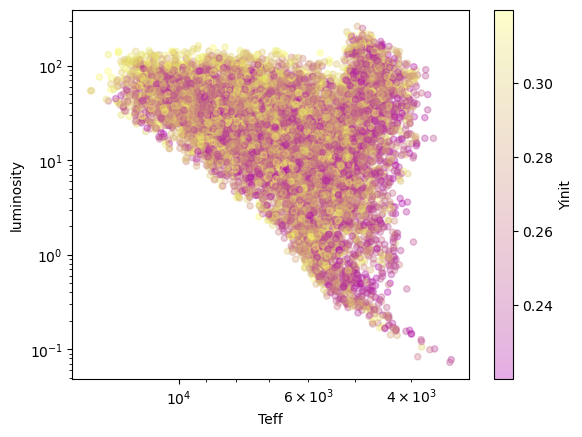

In [18]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="Yinit", cmap=cmc.buda, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

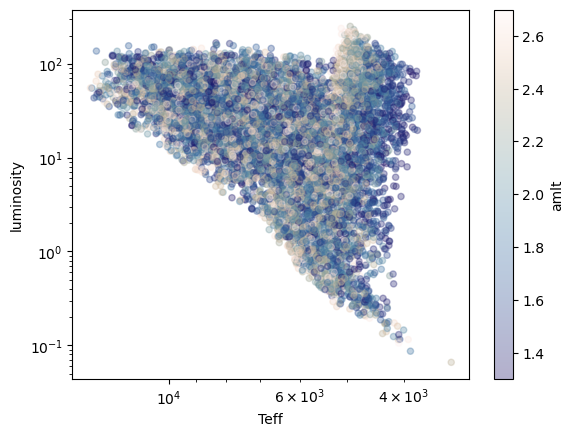

In [19]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="amlt", cmap=cmc.lapaz, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

Modify Beta parameters in Adam to be very close to 1.

BP - RP cut for.

In [20]:
grid["log_g"] = np.log10(
    cst.G.cgs * cst.M_sun.cgs * grid.star_mass / cst.R_sun.cgs**2 / grid.radius**2
)

Should we cut at first time Dnu < 2.0? What happens if Dnu never gets below this? What condition were they evolved to?

Instead should we just pick a lower log_g cut?

In [40]:
mask = grid.track.isin(ts)

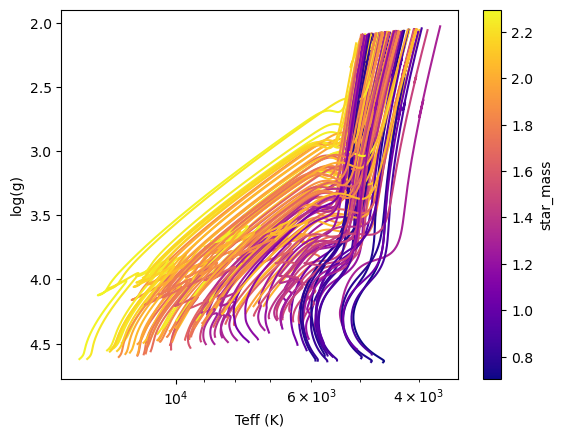

In [41]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    label = None
    c = cmap(
        norm(group[colorby].iloc[0])
    )
    ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale("log")
ax.set_xlabel("Teff (K)")
ax.set_ylabel("log(g)")
# ax.legend(title="M, Yinit, Zinit, amlt")
ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

In [23]:
grid["f_nuc"] = 10**(grid.log_Lnuc - grid.log_L)
grid["f_He"] = (grid.log_LHe - grid.log_L)

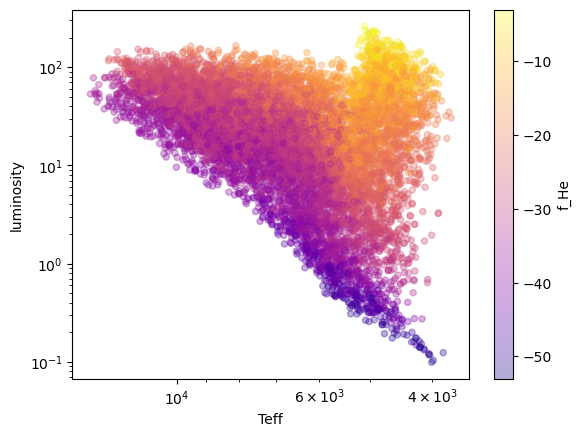

In [24]:
ax = grid.sample(num_samples).plot(x="Teff", y="luminosity", c="f_He", cmap=cm.plasma, kind="scatter", alpha=0.33)
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()

In [25]:
grid["Dnu_s"] = 135 * grid.star_mass**0.5 * grid.radius**-1.5

In [26]:
grid["f_Dnu"] = grid["Dnu_s"] / grid["Dnu_freq_o"]

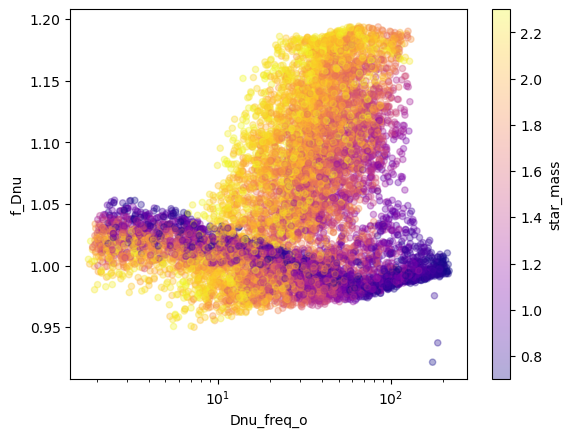

In [27]:
ax = grid.sample(num_samples).plot(x="Dnu_freq_o", y="f_Dnu", c="star_mass", kind="scatter", cmap="plasma", alpha=0.33)
ax.set_xscale("log")

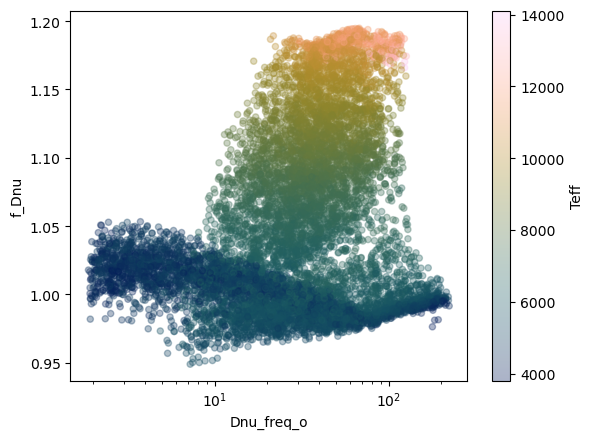

In [28]:
ax = grid.sample(num_samples).plot(x="Dnu_freq_o", y="f_Dnu", c="Teff", kind="scatter", cmap="cmc.batlow", alpha=0.33)
ax.set_xscale("log")

## Evolution of delta nu

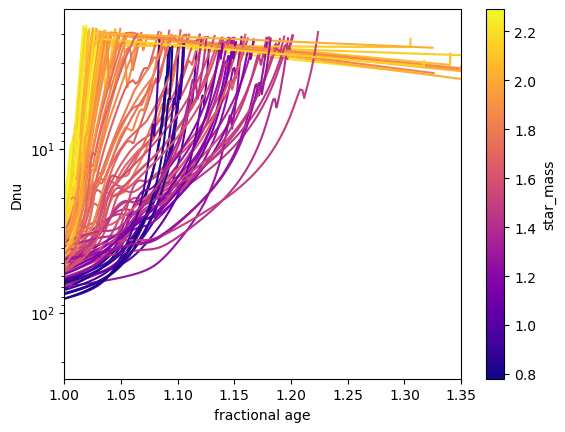

In [46]:
fig, ax = plt.subplots()
# cmap = cmc.batlow
cmap = cm.plasma
colorby = "star_mass"

vmin, vmax = grid.loc[mask, colorby].min(), grid.loc[mask, colorby].max()
norm = Normalize(vmin=vmin, vmax=vmax)

for idx, group in grid.loc[mask].groupby("track", sort=False):
    c = cmap(
        norm(group[colorby].iloc[0])
    )
#     f_age = group["star_age"] / group["star_age"].iloc[-1]

    # fraction of MS lifetime
    f_age = group["star_age"] / group.loc[(group["center_h1"] < 1e-12).idxmax(), "star_age"]
    ax.plot(f_age, group["Dnu_s"], c=c)
#     ax = group.plot(x="Teff", y="log_g", c=c, ax=ax, label=label)

ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xlabel("fractional age")
ax.set_ylabel("Dnu")
ax.set_xlim(1.0, 1.35)
# ax.legend(title="M, Yinit, Zinit, amlt")
# ax.get_legend().remove()

mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(mappable, ax=ax, label=colorby)

It seems that some high mass tracks have a huge jump in time for no clear reason. Could this be because of cuts I have previously made? Either way, choose to end when tracks reach their minimum Dnu values, or the first time they reach Dnu = 2 uHz for consistency. If you like can put in terms of mean density, not delta_nu fit to modes.

## EEP

It may be good to calculate EEP during grid cleaning.

1. ZAMS -- both center_h1 < (Xinit - 0.0015) AND Lnuc/L > 0.999
2. IAMS -- center_h1 < 0.3
3. TAMS -- center_h1 < 1e-12
4. END -- Dnu_s < 2 uHz (first time this happens)